## Problem 2

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('CH01PR19.txt', sep = '\s+', header =None, names=['Y','X1'])

In [3]:
df2 = pd.read_csv('CH08PR16.txt', sep = '\s+', header =None, names=['X2'])

In [4]:
Y = df1['Y']
X1 = df1['X1']
X2 = df2['X2']
df = pd.DataFrame({'Y':Y,'X1':X1,'X2':X2})
df.head()

,Y,X1,X2
0,3.897,21,0
1,3.885,14,1
2,3.778,28,0
3,2.540,22,1
4,3.028,21,0


In [5]:
x1 = df1['X1']
x2 = df2['X2']
y = df1['Y']

### a. Explain how each regression coefficient in model (8.33) is interpreted here

In [13]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
model = smf.ols('y ~ x1+x2', data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     4.914
Date:                Sat, 19 Nov 2022   Prob (F-statistic):            0.00893
Time:                        23:08:33   Log-Likelihood:                -112.19
No. Observations:                 120   AIC:                             230.4
Df Residuals:                     117   BIC:                             238.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1984      0.339      6.488      0.000       1.527       2.870
x1             0.0379      0.013      2.949      0.004       0.012       0.063
x2            -0.0943      0.120     -0.786      0.433      -0.332       0.143
==============================================================================
Omnibus:                       26.256   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.317
Skew:                          -0.977   Prob(JB):                     1.44e-10
Kurtosis:                       5.291   Cond. No.                         151.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* b1 = 0.0379; for every unit increase or decrease in X1, mean Y is increase or decrease by 0.0379 units.
* b2 = -0.0943; for every unit increase or decrease in X2, mean Y is increase or decrease by 0.0943 units.

### b. Fit the regression model and state the estimated regression function.

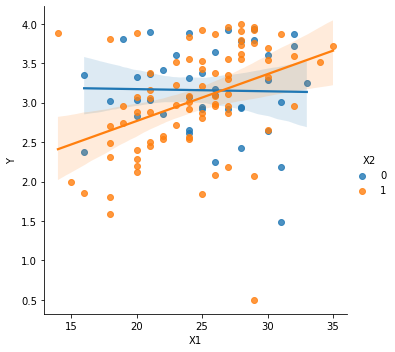

In [14]:
sns.lmplot(x='X1',y='Y',hue='X2',data=df)
plt.show()

**Coefficients**
* b0 = 2.1984	
* b1 = 0.0379	
* b2 = -0.0943

**Regression function:**
Y_hat = beta[0] + beta[1]*X1 + beta[2]*X2 
#### Y_hat = 2.1984 + (0.0379)X1 + (-0.0943)X2

### c. Test whether the X2 variable can be dropped from the regression model; use α = .01. State the alternatives, decision rule, and conclusion.

#### The alternatives:
* H0: β2 = 0
* Ha: β2 ≠ 0

#### The decision rule:
* If F∗ ≤ F(1−α; 1 , n-p), conclude H0
* If F∗ > F(1−α; 1 , n-p), conclude Ha

In [8]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
model1 = smf.ols('y ~ x1', data=df)
results1 = model1.fit()
sse1 = np.sum((results1.fittedvalues - df.Y)**2)
ssr1 = np.sum((results1.fittedvalues - df.Y.mean())**2)

In [9]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
model3 = smf.ols('y ~ x1+x2', data=df)
results3 = model3.fit()

In [10]:
sse12 = np.sum((results3.fittedvalues - df.Y)**2)
ssr12 = np.sum((results3.fittedvalues - df.Y.mean())**2)

In [11]:
ssrX2_X1 = ssr12 - ssr1
print('SSR(X2|X1)=',ssrX2_X1)
n = len(y)
Fstar = (ssrX2_X1/1 / (sse12/(n-3)))
print('F*=',Fstar)
import scipy.stats as stats
f = stats.f.ppf(q=1-0.01,dfn=1,dfd=n-3)
print('F=',f)

SSR(X2|X1)= 0.24071276344662396
F*= 0.6179313729082031
F= 6.856563808110685


**For α = 0.01, we have F(0.99; 1,n-3) = 6.856. Since
F∗ = 0.6179 ≤ 6.856, we conclude H0, that X2 can be dropped from the
regression model that already contains X1.**


### d.Fit regression model (8.49) and state the estimated regression function.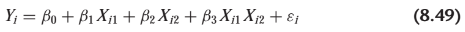

In [15]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
model1 = smf.ols('y ~ x1*x2', data=df)
results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     5.244
Date:                Sat, 19 Nov 2022   Prob (F-statistic):            0.00198
Time:                        23:09:15   Log-Likelihood:                -109.40
No. Observations:                 120   AIC:                             226.8
Df Residuals:                     116   BIC:                             237.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.2263      0.549      5.872      0.000       2.138       4.315
x1            -0.0028      0.021     -0.129      0.898      -0.045       0.040
x2            -1.6496      0.672     -2.454      0.016      -2.981      -0.318
x1:x2          0.0622      0.026      2.350      0.020       0.010       0.115
==============================================================================
Omnibus:                       28.768   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.541
Skew:                          -0.948   Prob(JB):                     1.59e-14
Kurtosis:                       6.019   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Coefficients**
* b0 = 3.2263	
* b1 = -0.0028	
* b2 = -1.6496
* b3 = 0.0622

**Regression function:**
Y_hat = beta[0] + beta[1]*X1 + beta[2]*X2 + beta[3]*X1*X2
#### Y_hat = 3.2263	 + (-0.0028)X1 + (-1.6496)X2 + (0.0622)X1X2

### e. Test whether the interaction term can be dropped from the model; use 𝛼=.05. State thealternatives, decision rule, and conclusion. If the interaction term cannot be dropped fromthe model, describe the nature of the interaction effect.

#### The alternatives:
* H0:β1=β2=β3=0
* Ha:β1≠0,β2≠0,β3≠0

#### The decision rule:
* If F∗ ≤ F(1−α, p-1 , n-p), conclude H0
* If F∗ > F(1−α, p-1 , n-p), conclude Ha

In [16]:
p = 3
n = len(y)
F_star = (ssr12/(p-1)) / ((sse12)/(n-p))
print('F*=',F_star)
F = stats.f.ppf(q=1-0.05,dfn=p-1,dfd=n-p)
print('F=',F)

F*= 4.9141276865928445
F= 3.073762904449709


**Since F∗ =4.914 > F=3.074, we conclude Ha that β1,β2, and β3 is significantly different from zero. To put it another way, the interaction term shouldn't be dropped from the model.**